In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, HeUniform
import threading

In [ ]:
dataset = pd.read_csv('UCI_Credit_Card.csv').drop(columns = ["ID"])
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
duplicate_rows = dataset[dataset.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 35


In [ ]:
dataset = dataset.drop_duplicates(keep='first')
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
dataset.isna().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [ ]:
dataset = dataset.rename(columns={dataset.columns[-1]: 'Label'})

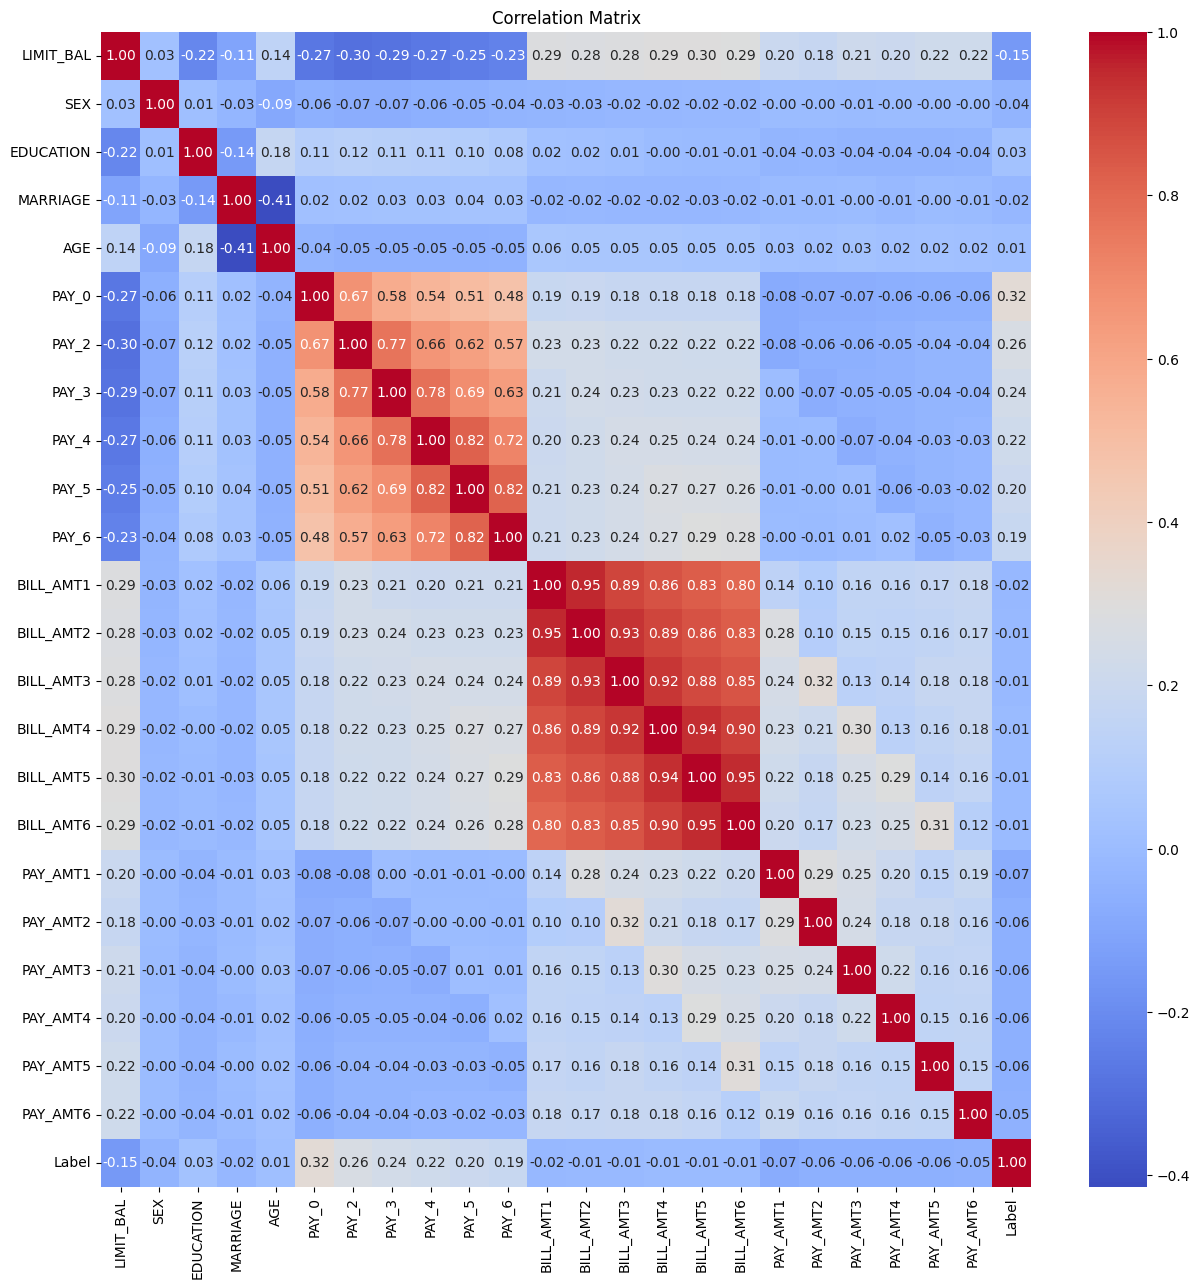

In [ ]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
selected_columns = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
                    'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'Label']

In [ ]:
dataset_selected = dataset[selected_columns]
dataset_selected = dataset_selected.reset_index(drop = True)
dataset_selected

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Label
0,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,1
1,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1
2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0
3,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0
4,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,0
29961,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,0
29962,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,1
29963,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,1


In [ ]:
Label = dataset_selected['Label']
dataset_selected = dataset_selected.drop(columns = ['Label'])
Label.value_counts()

,count
Label,
0,23335
1,6630


In [ ]:
sc = StandardScaler()
dataset_scaled = sc.fit_transform(dataset_selected)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(dataset_scaled, Label, test_size = 0.2, random_state = 95)

In [ ]:
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(23972, 15) (23972,)
(5993, 15) (5993,)


In [ ]:
pd.DataFrame(y_val).value_counts()

,count
Label,
0,18625
1,5347


In [ ]:
pd.DataFrame(y_test).value_counts()

,count
Label,
0,4710
1,1283


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_val.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class AntColony:
  def __init__(self,
               Colony_ID,
               in_shape,
               out_shape_W1,
               out_shape_b1,
               out_shape_W2,
               out_shape_b2,
               out_shape_W3,
               out_shape_b3,
               n_ants,
               X_val,
               y_val,
               model,
               epochs,
               weights_init = None):


    self.Colony_ID = Colony_ID
    self.in_shape = in_shape
    self.out_shape_W1 = out_shape_W1
    self.out_shape_b1 = out_shape_b1
    self.out_shape_W2 = out_shape_W2
    self.out_shape_b2 = out_shape_b2
    self.out_shape_W3 = out_shape_W3
    self.out_shape_b3 = out_shape_b3
    self.n_ants = n_ants
    self.pheromone_W1 = np.zeros(in_shape)
    self.pheromone_b1 = np.zeros(in_shape)
    self.pheromone_W2 = np.zeros(in_shape)
    self.pheromone_b2 = np.zeros(in_shape)
    self.pheromone_W3 = np.zeros(in_shape)
    self.pheromone_b3 = np.zeros(in_shape)
    self.best_weights = ()
    self.best_accuracy = 0.0
    self.X_val = X_val
    self.y_val = y_val
    self.model = model
    self.epochs = epochs
    self.weights_init = weights_init


  def Fit_Function(self, W1, b1, W2, b2, W3, b3, epoch):
    self.model.layers[0].set_weights([W1, b1.squeeze()])
    self.model.layers[1].set_weights([W2, b2.squeeze(1)])
    self.model.layers[2].set_weights([W3, b3.reshape(1)])
    y_pred = self.model.predict(self.X_val, verbose = 3)
    y_pred = (y_pred > 0.5).astype(int)
    ACC = accuracy_score(self.y_val, y_pred)

    if ACC > self.best_accuracy:
      self.best_accuracy = ACC
      self.best_weights = (W1, b1.squeeze(), W2, b2.squeeze(1), W3, b3.reshape(1))
      print(f"Found new weights with an Accuracy of {round(self.best_accuracy, 4) * 100} in Colony {self.Colony_ID} in epoch {epoch + 1}/{self.epochs}")

  def Random_Weights(self, shape_W1, shape_b1, shape_W2, shape_b2, shape_W3, shape_b3):
    if self.weights_init:
        W1 = np.array(self.weights_init(shape_W1)) + np.random.randn(*shape_W1) * 0.01
        b1 = np.array(self.weights_init(shape_b1)) + np.random.randn(*shape_b1) * 0.01
        W2 = np.array(self.weights_init(shape_W2)) + np.random.randn(*shape_W2) * 0.01
        b2 = np.array(self.weights_init(shape_b2)) + np.random.randn(*shape_b2) * 0.01
        W3 = np.array(self.weights_init(shape_W3)) + np.random.randn(*shape_W3) * 0.01
        b3 = np.array(self.weights_init(shape_b3)) + np.random.randn(*shape_b3) * 0.01
    else:
      W1 = np.random.randn(shape_W1[0], shape_W1[1])
      b1 = np.random.randn(shape_b1[0], shape_b1[1])
      W2 = np.random.randn(shape_W2[0], shape_W2[1])
      b2 = np.random.randn(shape_b2[0], shape_b2[1])
      W3 = np.random.randn(shape_W3[0], shape_W3[1])
      b3 = np.random.randn(shape_b3[0], shape_b3[1])
    return W1, b1, W2, b2, W3, b3


  def Reset_Pheromone(self):
    self.pheromone_W1 = np.zeros(self.in_shape)
    self.pheromone_b1 = np.zeros(self.in_shape)
    self.pheromone_W2 = np.zeros(self.in_shape)
    self.pheromone_b2 = np.zeros(self.in_shape)
    self.pheromone_W3 = np.zeros(self.in_shape)
    self.pheromone_b3 = np.zeros(self.in_shape)

  def Get_Top(self, arr, PH, output_shape):
    top_count = output_shape[0] * output_shape[1]
    PH = PH.reshape(-1)
    arr = arr.reshape(-1)
    PH_sorted = np.sort(PH)
    inds = np.argsort(PH)
    output = arr[inds[-top_count:]].reshape(output_shape)
    return output

  def RUN(self):
    for epoch in range(self.epochs):
      W1, b1, W2, b2, W3, b3 = self.Random_Weights(self.in_shape, self.in_shape, self.in_shape, self.in_shape, self.in_shape, self.in_shape)
      self.Reset_Pheromone()
      for ant in range(self.n_ants):
        ant_W1 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))
        ant_b1 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))
        ant_W2 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))
        ant_b2 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))
        ant_W3 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))
        ant_b3 = (random.randint(0, self.in_shape[1] - 1), random.randint(0, self.in_shape[1] - 1))

        self.pheromone_W1[ant_W1] += 1
        self.pheromone_b1[ant_b1] += 1
        self.pheromone_W2[ant_W2] += 1
        self.pheromone_b2[ant_b2] += 1
        self.pheromone_W3[ant_W3] += 1
        self.pheromone_b3[ant_b3] += 1



      current_W1 = self.Get_Top(W1, self.pheromone_W1, self.out_shape_W1)
      current_b1 = self.Get_Top(b1, self.pheromone_b1, self.out_shape_b1)
      current_W2 = self.Get_Top(W2, self.pheromone_W2, self.out_shape_W2)
      current_b2 = self.Get_Top(b2, self.pheromone_b2, self.out_shape_b2)
      current_W3 = self.Get_Top(W3, self.pheromone_W3, self.out_shape_W3)
      current_b3 = self.Get_Top(b3, self.pheromone_b3, self.out_shape_b3)

      self.Fit_Function(current_W1, current_b1, current_W2, current_b2, current_W3, current_b3, epoch)

    print("------------------------------------------------")
    print(f"<<< Colony {self.Colony_ID} has completed its runs. >>>")

In [ ]:
def Thread_Colony(colony):
    colony.RUN()

space_shape = (1000, 1000)
out_shape_W1 = model.layers[0].get_weights()[0].shape
out_shape_b1 = (model.layers[0].get_weights()[1].shape[0], 1)
out_shape_W2 = model.layers[1].get_weights()[0].shape
out_shape_b2 = (model.layers[1].get_weights()[1].shape[0], 1)
out_shape_W3 = model.layers[2].get_weights()[0].shape
out_shape_b3 = (1, 1)
n_ants = 200
epochs = 200
SEED = 42

list_weights_init = [GlorotNormal(seed = SEED), GlorotUniform(seed = SEED), HeUniform(seed = SEED), None]


colony1 = AntColony(1, space_shape, out_shape_W1, out_shape_b1, out_shape_W2, out_shape_b2, out_shape_W3, out_shape_b3, n_ants, X_val, y_val, model, epochs, list_weights_init[0])
colony2 = AntColony(2, space_shape, out_shape_W1, out_shape_b1, out_shape_W2, out_shape_b2, out_shape_W3, out_shape_b3, n_ants, X_val, y_val, model, epochs, list_weights_init[1])
colony3 = AntColony(3, space_shape, out_shape_W1, out_shape_b1, out_shape_W2, out_shape_b2, out_shape_W3, out_shape_b3, n_ants, X_val, y_val, model, epochs, list_weights_init[2])
colony4 = AntColony(4, space_shape, out_shape_W1, out_shape_b1, out_shape_W2, out_shape_b2, out_shape_W3, out_shape_b3, n_ants, X_val, y_val, model, epochs, list_weights_init[3])

colonies = [colony1, colony2, colony3, colony4]

threads = []
for i in range(len(colonies)):
    thread = threading.Thread(target=Thread_Colony, args=(colonies[i], ))
    threads.append(thread)

# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("------------------------------------------------")
print("<<< All colonies have completed their runs. >>>")

Found new weights with an Accuracy of 77.69 in Colony 3 in epoch 1/200
Found new weights with an Accuracy of 77.69 in Colony 4 in epoch 1/200
Found new weights with an Accuracy of 77.69 in Colony 1 in epoch 1/200
Found new weights with an Accuracy of 77.69 in Colony 2 in epoch 1/200
Found new weights with an Accuracy of 77.77 in Colony 4 in epoch 13/200
Found new weights with an Accuracy of 78.29 in Colony 4 in epoch 97/200
------------------------------------------------
<<< Colony 4 has completed its runs. >>>
------------------------------------------------
<<< Colony 2 has completed its runs. >>>
------------------------------------------------
<<< Colony 3 has completed its runs. >>>
------------------------------------------------
<<< Colony 1 has completed its runs. >>>
------------------------------------------------
<<< All colonies have completed their runs. >>>


In [ ]:
best_accuracy_list = [colo.best_accuracy for colo in colonies]

In [ ]:
print(f"The best Accuracy found in colonies for validation data is {round(np.max(best_accuracy_list), 4) * 100} % in colony ID '{colonies[np.argmax(best_accuracy_list)].Colony_ID}'")

The best Accuracy found in colonies for validation data is 78.29 % in colony ID '4'


In [ ]:
Best_Weights = colonies[np.argmax(best_accuracy_list)].best_weights
model.layers[0].set_weights([Best_Weights[0], Best_Weights[1]])
model.layers[1].set_weights([Best_Weights[2], Best_Weights[3]])
model.layers[2].set_weights([Best_Weights[4], Best_Weights[5]])

In [ ]:
# model.save_weights('Model_Weights_AC.weights.h5')

In [ ]:
model.load_weights('Model_Weights_AC.weights.h5')

In [ ]:
pre = model.predict(X_test)
pre = (pre > 0.5).astype(int)
print(classification_report(y_test, pre, digits = 4))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0     0.8507    0.9522    0.8986      4710
           1     0.6879    0.3866    0.4950      1283

    accuracy                         0.8311      5993
   macro avg     0.7693    0.6694    0.6968      5993
weighted avg     0.8159    0.8311    0.8122      5993



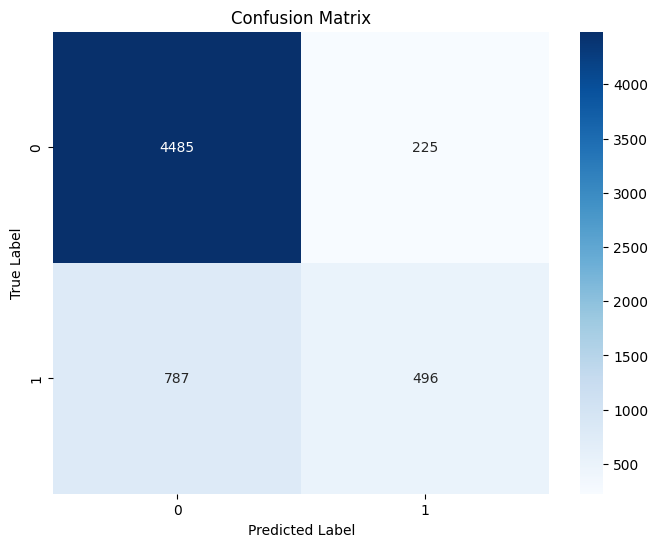

In [ ]:
cm = confusion_matrix(y_test, pre)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()